In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [18]:
# preparing data:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)
n_samples, n_features = x.shape

# 1. Model Design

In [22]:
input_size = n_features
output_size = 1

In [36]:
model = nn.Linear(input_size, output_size)


# 2. Loss and Optimizer

In [38]:
criterion = nn.MSELoss()
learning_rate = 0.01

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. Training

In [52]:
num_epoches = 100
for epoch in range(num_epoches):
    # forward pass and loss
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 10, loss = 3223.4780
epoch: 20, loss = 2432.5376
epoch: 30, loss = 1859.1663
epoch: 40, loss = 1443.1300
epoch: 50, loss = 1140.9982
epoch: 60, loss = 921.4121
epoch: 70, loss = 761.7040
epoch: 80, loss = 645.4680
epoch: 90, loss = 560.8201
epoch: 100, loss = 499.1410


# Plotting

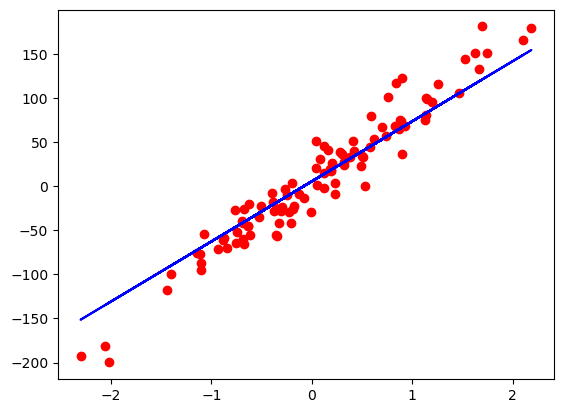

In [55]:
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()